In [57]:
! pip install qiskit==1.0.2 qiskit_aer pylatexenc

# ***Reference***: [Qiskit Quantum Paradoxes Series](https://youtube.com/playlist?list=PLOFEBzvs-VvoQP-EVyd5Di3UrPPc2YKIc&si=uocyAbh-5-_s62Am)

### Experiment configuration
The Wigner's friend paradox, proposed by the physicist Eugene Wigner in 1961, is a thought experiment that highlights the puzzling nature of quantum mechanics and the measurement problem. It is a variation of the famous Schrödinger's cat paradox and demonstrates the apparent conflict between the unitary evolution of a quantum system and the process of measurement or observation.

Here's how the paradox is described:

1. Imagine there is a laboratory with a sealed room inside. In this sealed room, there is a **friend** of the physicist Eugene Wigner, **let's call her Alice.**

2. Inside the sealed room, Alice performs a quantum experiment on a system that can be in a superposition of two states, let's say spin-up and spin-down.

3. According to quantum mechanics, before Alice measures the system, it exists in a superposition of both spin-up and spin-down states.

4. Alice measures the system's spin and obtains a definite result, either spin-up or spin-down.

5. From Alice's perspective inside the sealed room, the measurement has been performed, and the system has collapsed into one of the two possible states.

6. Now, consider Wigner, who is outside the sealed room and has not yet interacted with the system or Alice.

7. From Wigner's perspective, the entire system inside the sealed room (including Alice and the measured system) is still in a superposition of two states – one where Alice observed spin-up and the other where Alice observed spin-down.

8. This leads to a paradox: From Alice's perspective, she has already observed a definite outcome, but from Wigner's perspective, the system (including Alice) is still in a superposition of two states.

The Wigner's friend paradox highlights the apparent conflict between the two seemingly contradictory views of reality – one where the measurement has already taken place (Alice's perspective), and the other where the system is still in a superposition (Wigner's perspective).

This paradox emphasizes the challenge of reconciling the quantum mechanical description of reality with our classical intuitions about measurement and observation. It has sparked numerous discussions and interpretations within the field of quantum mechanics, and it remains an intriguing thought experiment that highlights the profound implications of quantum theory.

### Wigner's Friend And Deferred Measurement

The Wigner's friend paradox is closely related to the concept of deferred measurement in quantum mechanics.

Deferred measurement, also known as delayed measurement or delayed choice, refers to the idea that the act of measurement itself can be postponed or delayed in time and space. This means that the quantum system can remain in a superposition of states until a later time when the measurement is actually performed.

In the case of Wigner's friend paradox, the measurement performed by Alice inside the sealed room can be considered as a deferred measurement from Wigner's perspective outside the room. From Wigner's point of view, the measurement has not yet taken place, and the entire system (including Alice and the measured system) is still in a superposition of states.

The paradox arises because, according to quantum mechanics, the state of the system should evolve unitarily (following the Schrödinger equation) until a measurement is performed. However, from Alice's perspective, the measurement has already occurred, and the system has collapsed into a definite state. This apparent contradiction between the two perspectives highlights the issues surrounding the interpretation of quantum measurements and the role of the observer.

The concept of deferred measurement is closely tied to the Wigner's friend paradox because it questions when exactly the measurement occurs and whether the act of measurement can be postponed or delayed relative to different observers or reference frames.

This paradox and the idea of deferred measurement have been instrumental in exploring the foundations of quantum mechanics, the nature of measurement, and the role of the observer in the quantum world. They have motivated discussions and alternative interpretations, such as the many-worlds interpretation and the consistent histories approach, which attempt to resolve these apparent paradoxes and provide a coherent understanding of quantum phenomena.

**Alice and the Qubit**

In [58]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, array_to_latex, plot_histogram
from qiskit.circuit.library import Initialize
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.result import marginal_counts
from qiskit_aer import Aer, AerSimulator




from math import pi
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

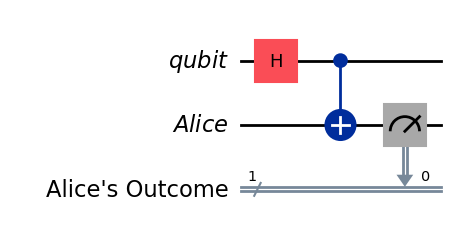

In [59]:
qr1 = QuantumRegister(1, name="qubit")
qr2 = QuantumRegister(1, name="Alice")
cr1 = ClassicalRegister(1, name="Alice's Outcome")

ckt = QuantumCircuit(qr1, qr2, cr1)

# initital conf
ckt.h(0)
ckt.cx(0,1)
ckt.measure(1,0)

ckt.draw("mpl")

In [60]:
# config
simulator = simulator = AerSimulator()
compiled_ckt = transpile(ckt, simulator)
shots = 10000

{'0': 5017, '1': 4983}


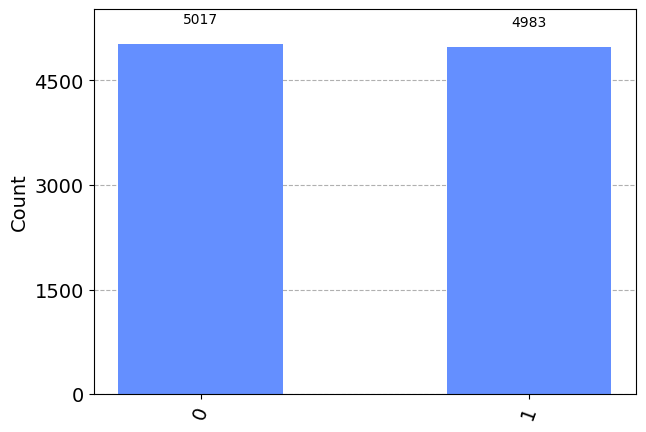

In [61]:
job = simulator.run(compiled_ckt, shots = shots)
result = job.result()
counts = result.get_counts()
print(result.get_counts())
plot_histogram(result.get_counts())

**Wigner and his friend Alice**

Now Alice is isolated in a room and Wigner can't see her(Alice's) outcome. From outside the room he asks her outcome and stores it. Ideally, while asking, Wigner also become entangled with the system (Qubit and Alice). How? Wigner's journal says the outcome is $|0⟩$, because Alice finds her measurement to be $|0⟩$ and the system qubit is also $|0⟩$. Similarly, Wigner's journal says the outcome is $|1⟩$, because Alice finds her measurement to be $|1⟩$ and the system qubit is also $|1⟩$.

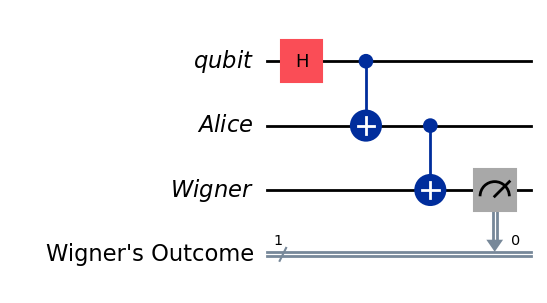

In [62]:
qr3 = QuantumRegister(1, name="Wigner")
cr2 = ClassicalRegister(1, name="Wigner's Outcome")

ckt2 = QuantumCircuit(qr1, qr2, qr3, cr2)
ckt2.h(0)
ckt2.cx(0,1)
ckt2.cx(1,2)
ckt2.measure(2, 0)

ckt2.draw("mpl")

{'0': 5003, '1': 4997}


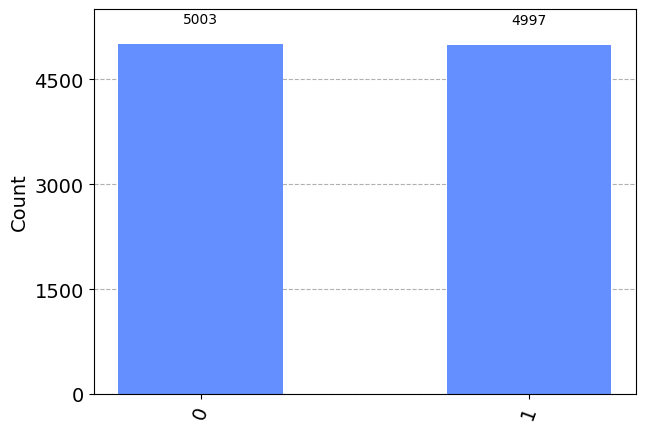

In [63]:
compiled_ckt = transpile(ckt2, simulator)
job = simulator.run(compiled_ckt, shots = shots)
result = job.result()
counts = result.get_counts()
print(result.get_counts())
plot_histogram(result.get_counts())

**Plot Twist**

When Wigner learns the outcome of his friend’s measurement, he sees a single outcome of either $|0⟩$ or of $|1⟩$.

So, when was the qubit actually projected into one of these states? If the act of observation causes an irreversible collapse, then there is a contradiction: Alice says the irreversible collapse happened the moment she measured the qubit, whereas Wigner says the irreversible collapse happened the moment Wigner measured his friend's outcome.


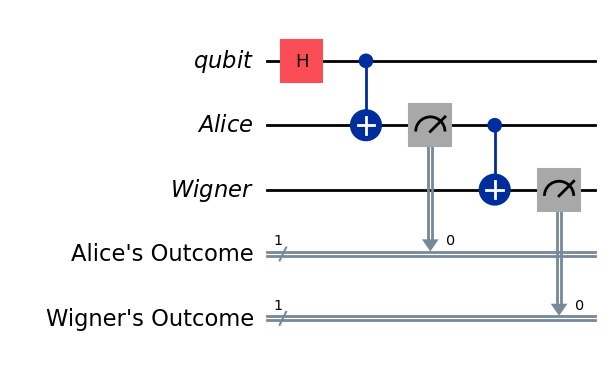

In [64]:
# Full quantum circuit from Alice's perspective:
ckt3 = QuantumCircuit(qr1, qr2, qr3, cr1, cr2)

ckt3.h(0)
ckt3.cx(0,1)
ckt3.measure(1, 0)

ckt3.cx(1,2)
ckt3.measure(2, 1)

ckt3.draw("mpl")

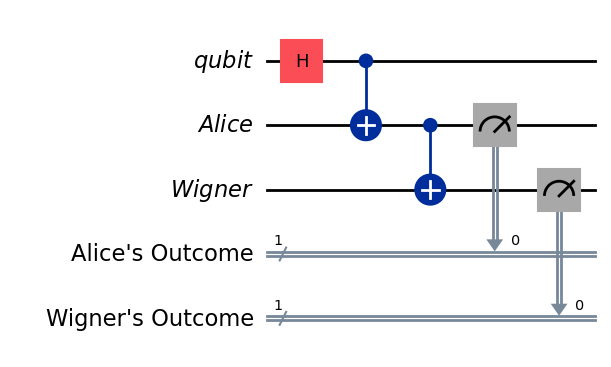

In [65]:
# Full quantum circuit from Wigner's perspective:
ckt4 = QuantumCircuit(qr1, qr2, qr3, cr1, cr2)

ckt4.h(0)
ckt4.cx(0, 1)
ckt4.cx(1, 2)

ckt4.measure(1, 0)
ckt4.measure(2, 1)
ckt4.draw("mpl")

The two quantum circuits disagree on whether the irreversible measurement on Alice's memory should be before or after the 2nd CNOT gate, i.e., whether it should be before Wigner's measurement of his friend's result, or after it. The "principle of deferred measurement" in quantum computing tells us that pushing an irreversible measurement through a control in a quantum circuit will make no difference to the distribution of measurement outcomes, so we will always get the same distribution of final outcomes either way, which we can see from running simulations of both circuits:



Alice's counts:  {'0 0': 4938, '1 1': 5062}


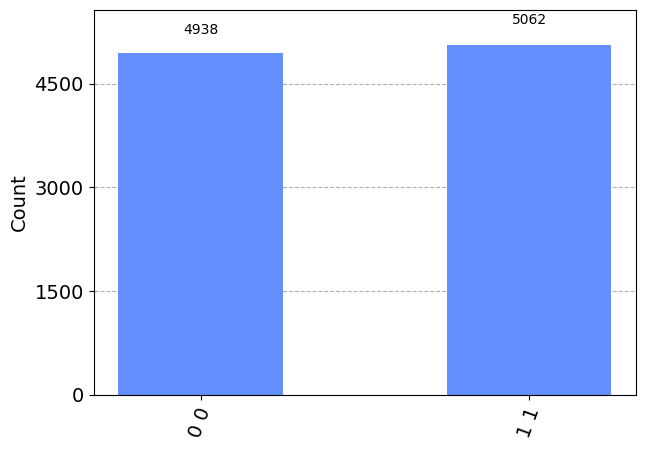

In [66]:
compiled_ckt = transpile(ckt3, simulator)
job = simulator.run(compiled_ckt, shots = shots)
result = job.result()
counts = result.get_counts()
print("Alice's counts: ", result.get_counts())
plot_histogram(result.get_counts())

Wigner's Counts:  {'0 0': 5049, '1 1': 4951}


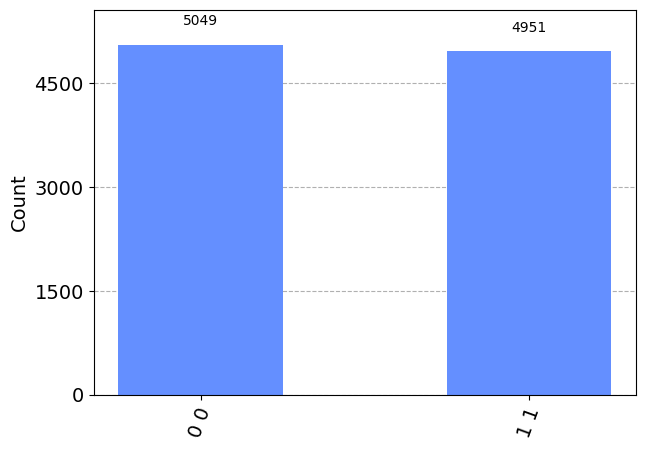

In [67]:
compiled_ckt = transpile(ckt4, simulator)
job = simulator.run(compiled_ckt, shots = shots)
result = job.result()
counts = result.get_counts()
print("Wigner's Counts: ", result.get_counts())
plot_histogram(result.get_counts())

However, Wigner and Alice disagree on the explanation for those outcomes. The conventional explanation of measurement in quantum mechanics is known as the "Copenhagen interpretation", which generally suggests that observation of a quantum system causes it to irreversibly collapse into a single state. The Copenhagen interpetation is so loosely defined that it gives no explanation for how measurement actually happens! It cannot resolve the Wigner's friend paradox, because it simply doesn't say anything else about measurement that could explain whose version of events is right.

One resolution to the Wigner's friend paradox is to get rid of irreversible measurement operations altogether, and treat all measurements as entangling interactions between quantum systems. Treating both Alice's measurement and Wigner's measurement using this approach leads to the following quantum circuit:

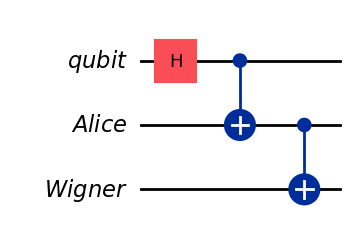

In [68]:
ckt5 = QuantumCircuit(qr1, qr2, qr3)
ckt5.h(0)
ckt5.cx(0,1)
ckt5.cx(1,2)

ckt5.draw("mpl")



Here we have no contradiction between the experiences of Wigner and his friend: Wigner's friend sees a single measurement outcome while entering an entangled superposition with the qubit, and Wigner sees a single measurement outcome when Wigner experiences an entangling interaction with the friend and joins in that entangled superposition, giving this as the final state: $\frac{1}{2}(|000\rangle + |111\rangle)$


Treating Wigner and his friend as fully quantum systems, without any irreversible measurement operations therefore resolves the paradox!
